In [ ]:
from google.colab import files
uploaded = files.upload()

Saving wine.csv to wine.csv


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score

In [ ]:
df_wine = pd.read_csv('wine.csv',index_col = 'datetime')
df_wine

,item_id,brand_id,brandfamily_id,package_id,info_id,order_id,user_id,province_id,city_id,quantity
datetime,,,,,,,,,,
2017-01-02,1,6,1,1,3,8806,404,2,19,8.298021
2017-01-02,1,14,1,1,3,8806,404,2,19,8.298021
2017-01-02,1,6,1,1,3,22552,404,2,19,8.298021
2017-01-02,1,14,1,1,3,22552,404,2,19,8.298021
2017-01-06,1,6,1,1,3,54066,395,0,10,0.377183
...,...,...,...,...,...,...,...,...,...,...
2020-09-21,12,19,3,4,11,52082,18,0,10,3.643725
2020-09-26,12,19,3,4,11,11453,450,0,10,1.457490
2020-09-11,12,19,3,4,11,58771,262,0,10,2.914980


We make date as index instead of features as it is not proper to use date to predict(too many different values)

In [ ]:
features = df_wine.iloc[:,0:9]
features

,item_id,brand_id,brandfamily_id,package_id,info_id,order_id,user_id,province_id,city_id
datetime,,,,,,,,,
2017-01-02,1,6,1,1,3,8806,404,2,19
2017-01-02,1,14,1,1,3,8806,404,2,19
2017-01-02,1,6,1,1,3,22552,404,2,19
2017-01-02,1,14,1,1,3,22552,404,2,19
2017-01-06,1,6,1,1,3,54066,395,0,10
...,...,...,...,...,...,...,...,...,...
2020-09-21,12,19,3,4,11,52082,18,0,10
2020-09-26,12,19,3,4,11,11453,450,0,10
2020-09-11,12,19,3,4,11,58771,262,0,10


In [ ]:
target = df_wine.iloc[:,9]
target

datetime
2017-01-02    8.298021
2017-01-02    8.298021
2017-01-02    8.298021
2017-01-02    8.298021
2017-01-06    0.377183
                ...   
2020-09-21    3.643725
2020-09-26    1.457490
2020-09-11    2.914980
2020-09-12    1.457490
2020-09-19    0.728745
Name: quantity, Length: 183546, dtype: float64

we seperate the features and target. Our target is to predict the sale quantities for different wine from 2017 to 2020

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.20,random_state = 9)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25,random_state = 9)

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(110127, 9)
(36710, 9)
(36709, 9)


We split data sets into 0.6 train set, 0.2 validation set, 0.2 test set

In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import *
from sklearn import linear_model 

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred_regr  = regr.predict(X_val)

lasso = linear_model.Lasso(alpha = 2)
lasso.fit(X_train, y_train)
y_pred_lasso= lasso.predict(X_val)


ridge = Ridge(alpha = 2)
ridge.fit(X_train, y_train)
y_pred_ridge= ridge.predict(X_val)


In [ ]:
from sklearn.metrics import *
print('Coefficients: ',regr.coef_)
print('MAE: ', mean_absolute_error(y_val,y_pred_regr))
print('RMSE: ', mean_squared_error(y_val,y_pred_regr, squared = False))
print(" ")

print('Coefficients: ',lasso.coef_)
print('MAE: ', mean_absolute_error(y_val,y_pred_lasso))
print('RMSE: ', mean_squared_error(y_val,y_pred_lasso, squared = False))
print(" ")


print('Coefficients: ',ridge.coef_)
print('MAE: ', mean_absolute_error(y_val,y_pred_ridge))
print('RMSE: ', mean_squared_error(y_val,y_pred_ridge, squared = False))

Coefficients:  [ 1.13291617e-02  2.29970839e-02 -5.26859687e-01 -1.82582438e-01
  8.35179319e-02  5.78008967e-07  7.80844167e-04  6.02683481e-01
  8.96822490e-02]
MAE:  2.525099509746962
RMSE:  3.115330854278501
 
Coefficients:  [ 7.69213802e-03  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  3.85720798e-07  4.11619549e-05  0.00000000e+00
  1.21640846e-01]
MAE:  2.815512632977833
RMSE:  3.3044959258319198
 
Coefficients:  [ 1.13292143e-02  2.29968637e-02 -5.26851467e-01 -1.82582559e-01
  8.35127196e-02  5.78008133e-07  7.80817935e-04  6.02650019e-01
  8.96849144e-02]
MAE:  2.5251010977646247
RMSE:  3.115330846508104


We start from some basic linear regressions models(multiple linear, lasso, ridge). They can already generate good results. We can also see lasso give huge penaty to some cofficients and make them 0(not siginificant). However, we still need try other models to see whether we can improve on it.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import neighbors
pipe_kNN = Pipeline (steps = [ ('model',neighbors.KNeighborsRegressor(n_neighbors=5))])
pipe_kNN_scaled = Pipeline (steps = [('Scaler', StandardScaler()), ('model',neighbors.KNeighborsRegressor(n_neighbors=5))])
pipe_kNN_scaled_pca = Pipeline (steps = [('Scaler', StandardScaler()), ('pca',PCA(n_components=6)), ('model',neighbors.KNeighborsRegressor(n_neighbors=5))])


pipe_list = [pipe_kNN, pipe_kNN_scaled, pipe_kNN_scaled_pca]

for pipe in pipe_list:
  model = pipe.fit(X_train, y_train) 
  pred = model.predict(X_val)
  print('model',pipe)
  print('mae', mean_absolute_error(y_val, pred))
  print('rmse', mean_squared_error(y_val, pred, squared=False))
  print(" ")

model Pipeline(memory=None,
         steps=[('model',
                 KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                     metric='minkowski', metric_params=None,
                                     n_jobs=None, n_neighbors=5, p=2,
                                     weights='uniform'))],
         verbose=False)
mae 2.4558367364241165
rmse 3.23800065582114
 
model Pipeline(memory=None,
         steps=[('Scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                     metric='minkowski', metric_params=None,
                                     n_jobs=None, n_neighbors=5, p=2,
                                     weights='uniform'))],
         verbose=False)
mae 1.2185723516038127
rmse 1.9861495580029673
 
model Pipeline(memory=None,
         steps=[('Scaler',
                 StandardScaler(copy=Tru

We then use piped KNN regression, we get better results, both mae and rmse are under 2.  We will try ensemble methods next

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model_bagging = RandomForestRegressor (n_estimators=30, random_state=0).fit(X_train, y_train)
pred = model_bagging.predict(X_val)
print(mean_absolute_error(y_val, pred))
print(mean_squared_error(y_val,pred, squared = False))

0.9299356745551811
1.6444097102043307


We find use randonforest, we can even achieve better performence. We select RandomForest as our baseline model. However,  We now need to tune the hyperparameters to improve. We try different number of estimatores(from 1 to 60) and compare the RMSE.

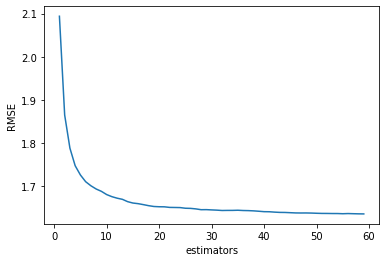

In [ ]:
results = pd.DataFrame(columns = ['estimators', 'RMSE'])
for i in np.arange(1, 60):
  model_RF = RandomForestRegressor (n_estimators=i, random_state=0).fit(X_train, y_train)
  pred = model_RF.predict(X_val)
  results.loc[i] = [i, mean_squared_error(y_val,pred, squared = False)]
sns.lineplot(x = 'estimators', y = 'RMSE', data = results)

In [ ]:
model_bagging = RandomForestRegressor (n_estimators=60, random_state=0).fit(X_train, y_train)
pred = model_bagging.predict(X_val)
print(mean_absolute_error(y_val, pred))
print(mean_squared_error(y_val,pred, squared = False))

0.9259676958087365
1.6347044235099513


Random Forest Regressor with large number of estimators is best model we find now. We pick a large number of estimators (60) as our final choosen paramater. Now we need to use test set to check performence of our best model.

In [ ]:
model_bagging = RandomForestRegressor (n_estimators=60, random_state=0).fit(X_train, y_train)
pred = model_bagging.predict(X_test)
print(mean_absolute_error(y_test, pred))
print(mean_squared_error(y_test,pred, squared = False))

0.9225040597264598
1.6238227241243381


Test our best model on test data, the result is still good. The model chosen is good and tested.